In [2]:
import pandas as pd
userProfile = pd.read_csv('cleaned/users_cleaned.csv')
animeList = pd.read_csv('cleaned/anime_cleaned.csv')
userToAnime = pd.read_csv('cleaned/animelists_cleaned.csv')

In [3]:
# Merge userToAnime with animeList to get the anime titles
merged_df = pd.merge(userToAnime, animeList[['anime_id', 'title']], on='anime_id')

# Group by anime title and count the number of unique users
anime_watch_count = merged_df.groupby('title')['username'].nunique().reset_index()

# Rename the columns for clarity
anime_watch_count.columns = ['title', 'user_count']

# Display the result
print(anime_watch_count)

                                             title  user_count
0        "Bungaku Shoujo" Kyou no Oyatsu: Hatsukoi        3560
1                         "Bungaku Shoujo" Memoire        4145
2                           "Bungaku Shoujo" Movie        8507
3     "Eikou Naki Tensai-tachi" Kara no Monogatari          39
4                                   "Eiyuu" Kaitai         231
...                                            ...         ...
6663                                      xxxHOLiC       24949
6664                                  xxxHOLiC Kei       12951
6665       xxxHOLiC Movie: Manatsu no Yoru no Yume        8562
6666                             xxxHOLiC Shunmuki        8113
6667                                       ēlDLIVE        3265

[6668 rows x 2 columns]


In [4]:
# Filter userToAnime to include only those with status of 1 (watching)
watching_df = userToAnime[userToAnime['my_status'] == 1]

# Merge watching_df with animeList to get the anime titles
merged_df = pd.merge(watching_df, animeList[['anime_id', 'title']], on='anime_id')

# Group by anime title and count the number of unique users
anime_watch_count = merged_df.groupby('title')['username'].nunique().reset_index()

# Rename the columns for clarity
anime_watch_count.columns = ['title', 'user_count']

# Display the result
print(anime_watch_count)

                                             title  user_count
0        "Bungaku Shoujo" Kyou no Oyatsu: Hatsukoi          29
1                         "Bungaku Shoujo" Memoire         138
2                           "Bungaku Shoujo" Movie         118
3     "Eikou Naki Tensai-tachi" Kara no Monogatari           3
4                                   "Eiyuu" Kaitai           5
...                                            ...         ...
6210                                      xxxHOLiC        1083
6211                                  xxxHOLiC Kei         328
6212       xxxHOLiC Movie: Manatsu no Yoru no Yume          39
6213                             xxxHOLiC Shunmuki         140
6214                                       ēlDLIVE         246

[6215 rows x 2 columns]


In [5]:
# Filter userToAnime to include only those with status of 1 (completed)
completed_df = userToAnime[userToAnime['my_status'] == 1]

# Merge completed_df with animeList to get the anime titles
merged_completed_df = pd.merge(completed_df, animeList[['anime_id', 'title']], on='anime_id')

# Group by anime title and count the number of unique users
anime_completed_count = merged_completed_df.groupby('title')['username'].nunique().reset_index()

# Rename the columns for clarity
anime_completed_count.columns = ['title', 'user_count']

# Sort the dataframe by user_count in descending order and get the top 10
top_10_completed_anime = anime_completed_count.sort_values(by='user_count', ascending=False).head(10)

# Display the result
print(top_10_completed_anime)

                                 title  user_count
4017                         One Piece       25433
3787                Naruto: Shippuuden       20233
573                             Bleach       13118
606   Boku no Hero Academia 3rd Season       10967
1047             Darling in the FranXX       10920
1393                        Fairy Tail        9802
1739                           Gintama        8035
5590                    Tokyo Ghoul:re        7315
642    Boruto: Naruto Next Generations        7130
5207                     Steins;Gate 0        7042


In [6]:
# Filter userToAnime to include only those with status of 1 (completed)
completed_df = userToAnime[userToAnime['my_status'] == 4]

# Merge completed_df with animeList to get the anime titles
merged_completed_df = pd.merge(completed_df, animeList[['anime_id', 'title']], on='anime_id')

# Group by anime title and count the number of unique users
anime_completed_count = merged_completed_df.groupby('title')['username'].nunique().reset_index()

# Rename the columns for clarity
anime_completed_count.columns = ['title', 'user_count']

# Sort the dataframe by user_count in descending order and get the top 10
top_10_completed_anime = anime_completed_count.sort_values(by='user_count', ascending=False).head(10)

# Display the result
print(top_10_completed_anime)

                   title  user_count
595               Bleach       11807
3899  Naruto: Shippuuden        9424
3887              Naruto        7247
4143           One Piece        6696
1444          Fairy Tail        6094
4436             Pokemon        4120
2470            InuYasha        3748
3278          Lucky☆Star        3371
1014          D.Gray-man        3199
5292          Soul Eater        3127


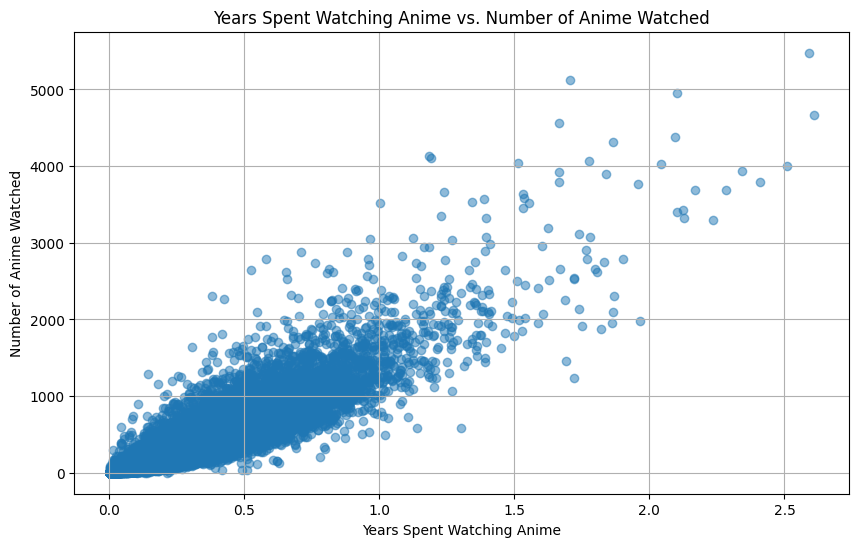

In [7]:
import matplotlib.pyplot as plt

# Convert days spent watching to years
userProfile['years_spent_watching'] = userProfile['user_days_spent_watching'] / 365

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(userProfile['years_spent_watching'], userProfile['user_completed'], alpha=0.5)
plt.xlabel('Years Spent Watching Anime')
plt.ylabel('Number of Anime Watched')
plt.title('Years Spent Watching Anime vs. Number of Anime Watched')
plt.grid(True)
plt.show()

In [8]:
# Filter userProfile by gender
male_users = userProfile[userProfile['gender'] == 'Male']
female_users = userProfile[userProfile['gender'] == 'Female']
non_binary_users = userProfile[userProfile['gender'] == 'Non-Binary']

# Merge with userToAnime to get the anime titles for each gender
male_completed = pd.merge(male_users[['username']], userToAnime[userToAnime['my_status'] == 2], on='username')
female_completed = pd.merge(female_users[['username']], userToAnime[userToAnime['my_status'] == 2], on='username')
non_binary_completed = pd.merge(non_binary_users[['username']], userToAnime[userToAnime['my_status'] == 2], on='username')

# Merge with animeList to get the anime titles
male_completed = pd.merge(male_completed, animeList[['anime_id', 'title']], on='anime_id')
female_completed = pd.merge(female_completed, animeList[['anime_id', 'title']], on='anime_id')
non_binary_completed = pd.merge(non_binary_completed, animeList[['anime_id', 'title']], on='anime_id')

# Group by anime title and count the number of unique users who have completed each anime
male_anime_count = male_completed.groupby('title')['username'].nunique().reset_index()
female_anime_count = female_completed.groupby('title')['username'].nunique().reset_index()
non_binary_anime_count = non_binary_completed.groupby('title')['username'].nunique().reset_index()

# Rename the columns for clarity
male_anime_count.columns = ['title', 'user_count']
female_anime_count.columns = ['title', 'user_count']
non_binary_anime_count.columns = ['title', 'user_count']

# Sort the dataframes by user_count in descending order and get the top anime
most_popular_male_anime = male_anime_count.sort_values(by='user_count', ascending=False).head(5)
most_popular_female_anime = female_anime_count.sort_values(by='user_count', ascending=False).head(5)
most_popular_non_binary_anime = non_binary_anime_count.sort_values(by='user_count', ascending=False).head(5)

# Display the results
print("Most popular anime for male users:")
print(most_popular_male_anime)

print("\nMost popular anime for female users:")
print(most_popular_female_anime)

print("\nMost popular anime for non-binary users:")
print(most_popular_non_binary_anime)

Most popular anime for male users:
                                title  user_count
1095                       Death Note       46785
5439                 Sword Art Online       40031
916   Code Geass: Hangyaku no Lelouch       39945
220                      Angel Beats!       38204
5085               Shingeki no Kyojin       37735

Most popular anime for female users:
                              title  user_count
1076                     Death Note       21706
4206         Ouran Koukou Host Club       21153
4855  Sen to Chihiro no Kamikakushi       19895
2272            Howl no Ugoku Shiro       16970
5874                 Vampire Knight       16601

Most popular anime for non-binary users:
                              title  user_count
4258             Shingeki no Kyojin         340
937                      Death Note         334
4144  Sen to Chihiro no Kamikakushi         302
3505                  One Punch Man         286
4564               Sword Art Online         279


In [9]:
# Sort the animeList dataframe by the 'rank' column in ascending order
ranked_anime = animeList.sort_values(by='rank', ascending=True)

# Display the top 10 ranked anime
print(ranked_anime.head(10))

      anime_id                             title  \
1261      5114  Fullmetal Alchemist: Brotherhood   
529      32281                    Kimi no Na wa.   
639      28977                          Gintama°   
2953     30484                     Steins;Gate 0   
1475      9253                       Steins;Gate   
6100       820              Ginga Eiyuu Densetsu   
4284      9969                     Gintama&#039;   
223      11061            Hunter x Hunter (2011)   
668      35180        3-gatsu no Lion 2nd Season   
2774     15417          Gintama&#039;: Enchousen   

                              title_english              title_japanese  \
1261       Fullmetal Alchemist: Brotherhood  鋼の錬金術師 FULLMETAL ALCHEMIST   
529                              Your Name.                       君の名は。   
639                        Gintama Season 4                         銀魂°   
2953                                    NaN               シュタインズ・ゲート ゼロ   
1475                            Steins;Gate         

In [10]:
# Calculate the average score and count of scores for each anime scored by women
female_anime_scores = female_completed.groupby('title')['my_score'].agg(['mean', 'count']).reset_index()

# Rename the columns for clarity
female_anime_scores.columns = ['title', 'average_score', 'score_count']

# Filter to include only anime with more than 300 votes
female_anime_scores = female_anime_scores[female_anime_scores['score_count'] > 300]

# Sort the dataframe by average_score in descending order and get the top 10
top_10_female_anime_scores = female_anime_scores.sort_values(by='average_score', ascending=False).head(10)

# Display the result
print(top_10_female_anime_scores)

                                                  title  average_score  \
1537                   Fullmetal Alchemist: Brotherhood       8.545109   
2280                             Hunter x Hunter (2011)       8.432610   
3695                                            Monster       8.358070   
1791                                           Gintama°       8.340155   
1780                                      Gintama&#039;       8.304990   
1777                                            Gintama       8.282450   
2807                                     Kimi no Na wa.       8.221943   
5245                                        Steins;Gate       8.195990   
1779  Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...       8.142780   
34                           3-gatsu no Lion 2nd Season       8.119565   

      score_count  
1537        11040  
2280         3643  
3695         2466  
1791         1417  
1780         2505  
1777         3282  
2807         7556  
5245         7531  
1779 

In [11]:
# Calculate the average score and count of scores for each anime scored by men
male_anime_scores = male_completed.groupby('title')['my_score'].agg(['mean', 'count']).reset_index()

# Rename the columns for clarity
male_anime_scores.columns = ['title', 'average_score', 'score_count']

# Filter to include only anime with more than 300 votes
male_anime_scores = male_anime_scores[male_anime_scores['score_count'] > 300]

# Sort the dataframe by average_score in descending order and get the top 10
top_10_male_anime_scores = male_anime_scores.sort_values(by='average_score', ascending=False).head(10)

# Display the result
print(top_10_male_anime_scores)

                                 title  average_score  score_count
1780              Ginga Eiyuu Densetsu       8.743208         2687
5347                       Steins;Gate       8.694957        32107
1563  Fullmetal Alchemist: Brotherhood       8.658362        34197
891               Clannad: After Story       8.595064        26945
2869                    Kimi no Na wa.       8.589688        19958
35          3-gatsu no Lion 2nd Season       8.565669         2406
2329            Hunter x Hunter (2011)       8.539776        16216
1822                          Gintama°       8.492246         4707
2963                    Koe no Katachi       8.434955        13875
1808                           Gintama       8.429202         9068


In [12]:
# Filter userToAnime to include only those with status of 5 (plan to watch)
plan_to_watch_df = userToAnime[userToAnime['my_status'] == 6]

# Merge plan_to_watch_df with animeList to get the anime titles
merged_plan_to_watch_df = pd.merge(plan_to_watch_df, animeList[['anime_id', 'title']], on='anime_id')

# Group by anime title and count the number of unique users
anime_plan_to_watch_count = merged_plan_to_watch_df.groupby('title')['username'].nunique().reset_index()

# Rename the columns for clarity
anime_plan_to_watch_count.columns = ['title', 'user_count']

# Sort the dataframe by user_count in descending order and get the top anime
most_anticipated_anime = anime_plan_to_watch_count.sort_values(by='user_count', ascending=False).head(10)

# Display the result
print(most_anticipated_anime)

                                      title  user_count
3964                               Mushishi       12784
405                                Baccano!       12332
1112  Darker than Black: Kuro no Keiyakusha       11669
1461                             Ergo Proxy       11627
5319                         Shinsekai yori       11526
3907                                Monster       11339
4062                     Natsume Yuujinchou       11146
2291              Higurashi no Naku Koro ni       10950
3989                        NHK ni Youkoso!       10865
1870                                Gintama       10479


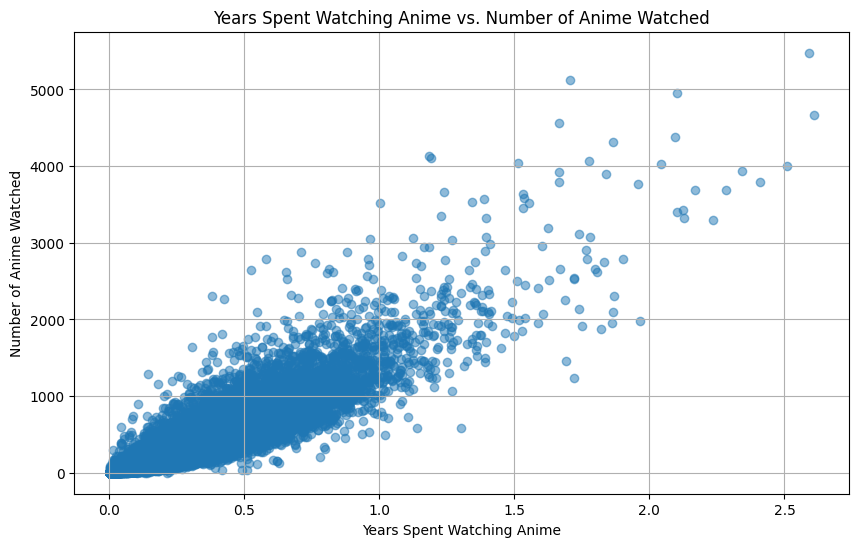

In [13]:
import matplotlib.pyplot as plt

# Convert days spent watching to years
userProfile['years_spent_watching'] = userProfile['user_days_spent_watching'] / 365

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(userProfile['years_spent_watching'], userProfile['user_completed'], alpha=0.5)
plt.xlabel('Years Spent Watching Anime')
plt.ylabel('Number of Anime Watched')
plt.title('Years Spent Watching Anime vs. Number of Anime Watched')
plt.grid(True)
plt.show()

d:\GITHUB\datamining-anime-synopsis-mining\.env\Lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


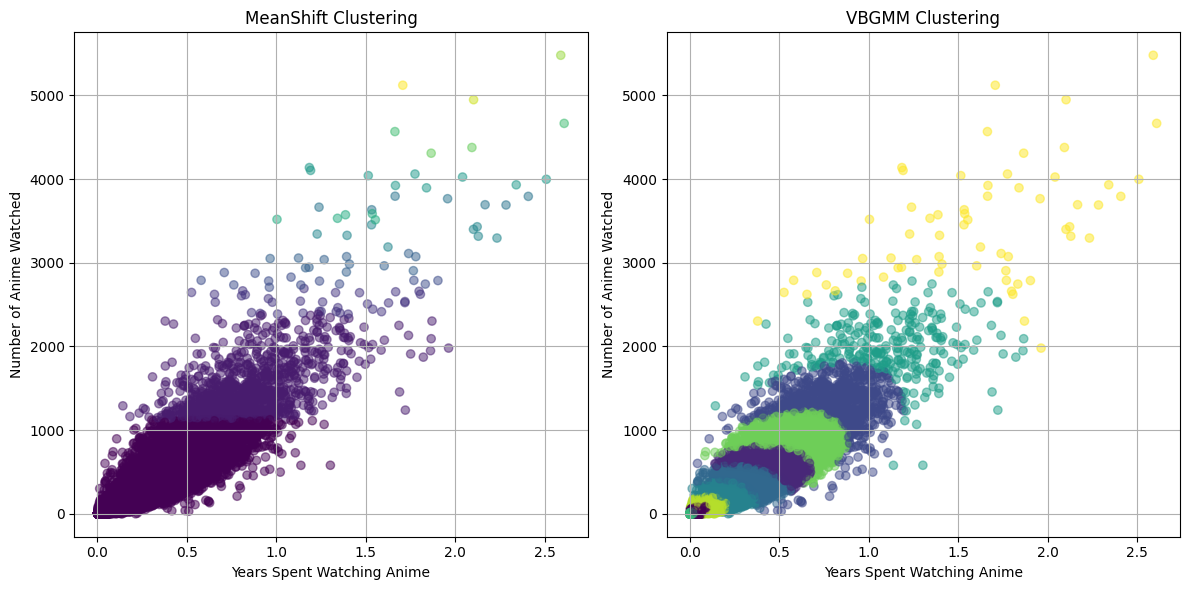

In [14]:
from sklearn.cluster import MeanShift
from sklearn.mixture import BayesianGaussianMixture

import matplotlib.pyplot as plt

# Extract the relevant columns
X = userProfile[['years_spent_watching', 'user_completed']].values

# Perform MeanShift clustering
mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(X)

# Perform Variational Bayesian Gaussian Mixture Model clustering
vbgmm = BayesianGaussianMixture(n_components=10, covariance_type='full', weight_concentration_prior_type='dirichlet_process')
vbgmm_labels = vbgmm.fit_predict(X)

# Plot the MeanShift clustering results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=mean_shift_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Years Spent Watching Anime')
plt.ylabel('Number of Anime Watched')
plt.title('MeanShift Clustering')
plt.grid(True)

# Plot the VBGMM clustering results
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=vbgmm_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Years Spent Watching Anime')
plt.ylabel('Number of Anime Watched')
plt.title('VBGMM Clustering')
plt.grid(True)

plt.tight_layout()
plt.show()

In [15]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# MeanShift model evaluation
mean_shift_silhouette = silhouette_score(X, mean_shift_labels)
mean_shift_davies_bouldin = davies_bouldin_score(X, mean_shift_labels)

print("MeanShift Model Evaluation:")
print(f"Silhouette Score: {mean_shift_silhouette}")
print(f"Davies-Bouldin Index: {mean_shift_davies_bouldin}")

# BayesianGaussianMixture model evaluation
vbgmm_silhouette = silhouette_score(X, vbgmm_labels)
vbgmm_davies_bouldin = davies_bouldin_score(X, vbgmm_labels)

print("\nBayesianGaussianMixture Model Evaluation:")
print(f"Silhouette Score: {vbgmm_silhouette}")
print(f"Davies-Bouldin Index: {vbgmm_davies_bouldin}")


MeanShift Model Evaluation:
Silhouette Score: 0.8292832833265507
Davies-Bouldin Index: 0.3435166168795186

BayesianGaussianMixture Model Evaluation:
Silhouette Score: 0.26403009614407236
Davies-Bouldin Index: 0.6826363814228309


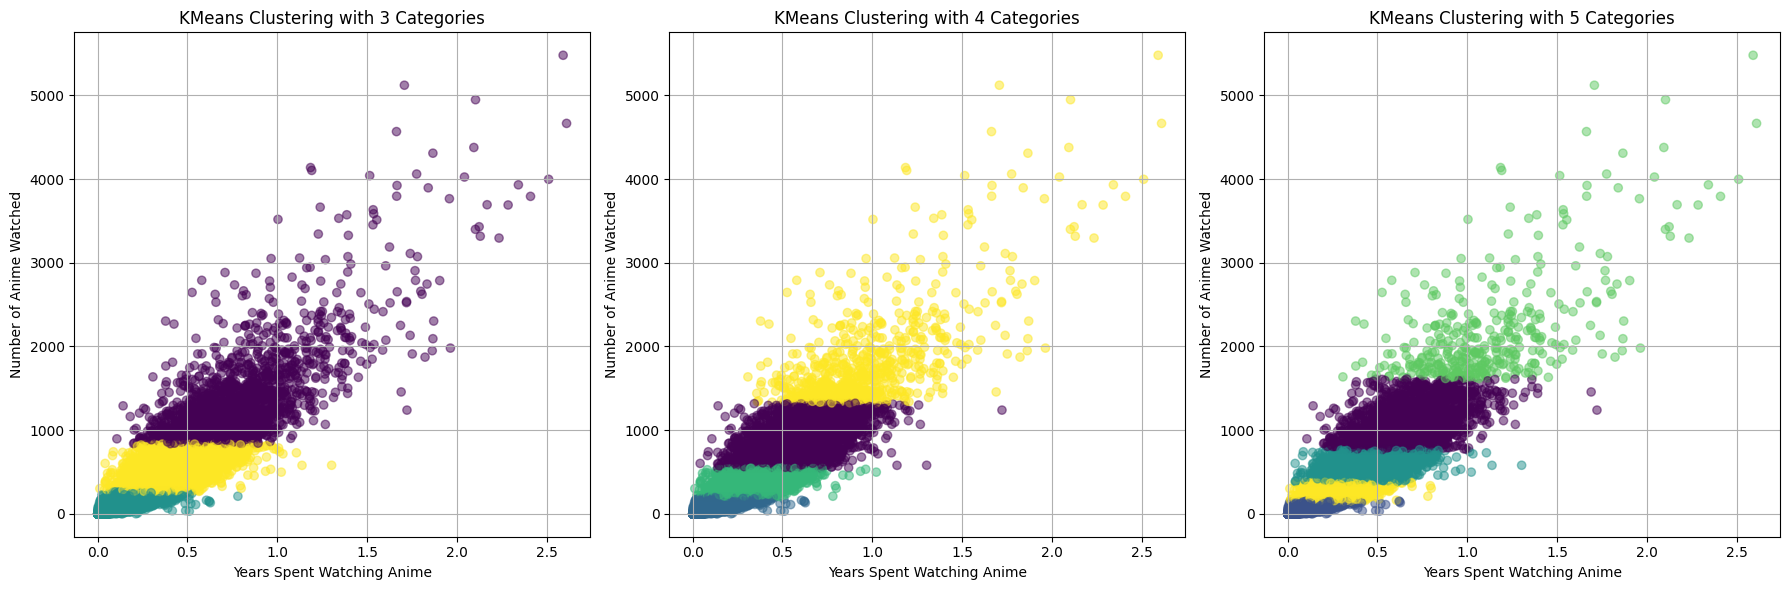

In [16]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

# Perform KMeans clustering with 3, 4, and 5 categories
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_5 = KMeans(n_clusters=5, random_state=42)

kmeans_3_labels = kmeans_3.fit_predict(X)
kmeans_4_labels = kmeans_4.fit_predict(X)
kmeans_5_labels = kmeans_5.fit_predict(X)

# Plot the KMeans clustering results
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_3_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Years Spent Watching Anime')
plt.ylabel('Number of Anime Watched')
plt.title('KMeans Clustering with 3 Categories')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_4_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Years Spent Watching Anime')
plt.ylabel('Number of Anime Watched')
plt.title('KMeans Clustering with 4 Categories')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_5_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Years Spent Watching Anime')
plt.ylabel('Number of Anime Watched')
plt.title('KMeans Clustering with 5 Categories')
plt.grid(True)

plt.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate KMeans with 3 categories
kmeans_3_silhouette = silhouette_score(X, kmeans_3_labels)
kmeans_3_davies_bouldin = davies_bouldin_score(X, kmeans_3_labels)

# Evaluate KMeans with 4 categories
kmeans_4_silhouette = silhouette_score(X, kmeans_4_labels)
kmeans_4_davies_bouldin = davies_bouldin_score(X, kmeans_4_labels)

# Evaluate KMeans with 5 categories
kmeans_5_silhouette = silhouette_score(X, kmeans_5_labels)
kmeans_5_davies_bouldin = davies_bouldin_score(X, kmeans_5_labels)

# Print the results
print("KMeans with 3 categories:")
print(f"Silhouette Score: {kmeans_3_silhouette}")
print(f"Davies-Bouldin Index: {kmeans_3_davies_bouldin}")

print("\nKMeans with 4 categories:")
print(f"Silhouette Score: {kmeans_4_silhouette}")
print(f"Davies-Bouldin Index: {kmeans_4_davies_bouldin}")

print("\nKMeans with 5 categories:")
print(f"Silhouette Score: {kmeans_5_silhouette}")
print(f"Davies-Bouldin Index: {kmeans_5_davies_bouldin}")

KMeans with 3 categories:
Silhouette Score: 0.6637663033982664
Davies-Bouldin Index: 0.54290825593804

KMeans with 4 categories:
Silhouette Score: 0.6334942127311645
Davies-Bouldin Index: 0.5283999097158828

KMeans with 5 categories:
Silhouette Score: 0.6059674802021975
Davies-Bouldin Index: 0.5268244147408179


In [18]:
# Add a new column to userProfile for MeanShift cluster labels
userProfile['mean_shift_cluster'] = mean_shift_labels

# Display the updated userProfile DataFrame
print(userProfile['mean_shift_cluster'].unique)

<bound method Series.unique of 0         0
1         0
2         0
3         0
4         0
         ..
108706    0
108707    0
108708    0
108709    0
108710    0
Name: mean_shift_cluster, Length: 108711, dtype: int64>


In [19]:
#cluster 0, 1, 2, 3, and summarize 4 to the last
userProfile['mean_shift_cluster'] = userProfile['mean_shift_cluster'].apply(lambda x: x if x < 4 else 4)

In [20]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Extract the relevant columns
X = userProfile[['years_spent_watching', 'user_completed']].values

# Define the target variable (for example, using mean_shift_cluster as the target)
y = userProfile['mean_shift_cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SGD classifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

# Make predictions
y_pred = sgd_clf.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21513
           1       0.91      0.92      0.91       206
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         4
           4       1.00      0.67      0.80        12

    accuracy                           1.00     21743
   macro avg       0.58      0.52      0.54     21743
weighted avg       1.00      1.00      1.00     21743



d:\GITHUB\datamining-anime-synopsis-mining\.env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\GITHUB\datamining-anime-synopsis-mining\.env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\GITHUB\datamining-anime-synopsis-mining\.env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

In [21]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# Create an RBF sampler
rbf_feature = RBFSampler(gamma=1, random_state=42)

# Create a pipeline with RBF sampler and SGD classifier
rbf_sgd_clf = make_pipeline(rbf_feature, SGDClassifier(random_state=42))

# Train the classifier
rbf_sgd_clf.fit(X_train, y_train)

# Make predictions
y_pred_rbf = rbf_sgd_clf.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21513
           1       0.96      0.98      0.97       206
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         4
           4       1.00      0.25      0.40        12

    accuracy                           1.00     21743
   macro avg       0.59      0.45      0.47     21743
weighted avg       1.00      1.00      1.00     21743



d:\GITHUB\datamining-anime-synopsis-mining\.env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\GITHUB\datamining-anime-synopsis-mining\.env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\GITHUB\datamining-anime-synopsis-mining\.env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

In [ ]:
# Add cluster labels to the userToAnime dataframe
userToAnime['cluster'] = userProfile['mean_shift_cluster']

# Merge userToAnime with animeList to get the anime titles
merged_cluster_df = pd.merge(userToAnime, animeList[['anime_id', 'title']], on='anime_id')

# Group by cluster and anime title, and count the number of unique users
cluster_anime_count = merged_cluster_df.groupby(['cluster', 'title'])['username'].size().reset_index(name='user_count')

# Get the top 10 animes for each cluster
top_10_animes_per_cluster = cluster_anime_count.groupby('cluster').apply(lambda x: x.sort_values(by='user_count', ascending=False).head(10)).reset_index(drop=True)

# Display the result
print(top_10_animes_per_cluster)

    cluster                                              title  user_count
0       0.0                                          One Piece         240
1       0.0                                         Death Note         210
2       0.0                                             Naruto         202
3       0.0                                             Bleach         201
4       0.0                                Fullmetal Alchemist         181
5       0.0                    Code Geass: Hangyaku no Lelouch         180
6       0.0                                 Naruto: Shippuuden         175
7       0.0                   Fullmetal Alchemist: Brotherhood         172
8       0.0                         Tengen Toppa Gurren Lagann         171
9       0.0                                         Soul Eater         171
10      1.0                    Bleach: The Sealed Sword Frenzy           5
11      1.0                                         Death Note           4
12      1.0              

C:\Users\User\AppData\Local\Temp\ipykernel_9580\2057487933.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_animes_per_cluster = cluster_anime_count.groupby('cluster').apply(lambda x: x.sort_values(by='user_count', ascending=False).head(10)).reset_index(drop=True)


In [27]:
cluster_anime_count
total_user_count_per_cluster = cluster_anime_count.groupby('cluster')['user_count'].sum().reset_index()
print(total_user_count_per_cluster)
pd.Series(mean_shift_labels).value_counts()

   cluster  user_count
0      0.0      107543
1      1.0        1075
2      2.0          32
3      3.0          13
4      4.0          48


0     107543
1       1075
2         32
3         13
4         12
7          9
6          8
5          7
8          5
10         2
9          2
11         1
13         1
12         1
Name: count, dtype: int64

In [ ]:
import numpy as np

def recommend_anime(hours_spent_watching, anime_completed):
    # Convert hours spent watching to years
    years_spent_watching = hours_spent_watching / (24 * 365)
    
    # Create a numpy array for the input
    input_data = np.array([[years_spent_watching, anime_completed]])
    
    # Predict the cluster using the MeanShift model
    cluster_label = mean_shift.predict(input_data)[0]
    
    # Get the top 10 anime recommendations for the identified cluster
    recommendations = top_10_animes_per_cluster[top_10_animes_per_cluster['cluster'] == cluster_label]
    
    return recommendations[['title', 'user_count']]

# Example usage
hours_spent_watching = 1000  # Example input
anime_completed = 50         # Example input
recommendations = recommend_anime(hours_spent_watching, anime_completed)
print(recommendations)

                              title  user_count
0                         One Piece         240
1                        Death Note         210
2                            Naruto         202
3                            Bleach         201
4               Fullmetal Alchemist         181
5   Code Geass: Hangyaku no Lelouch         180
6                Naruto: Shippuuden         175
7  Fullmetal Alchemist: Brotherhood         172
8        Tengen Toppa Gurren Lagann         171
9                        Soul Eater         171


In [32]:
import joblib

# Assuming `mean_shift` is your trained model
joblib.dump(mean_shift, 'mean_shift_model.pkl')

['mean_shift_model.pkl']

In [1]:
import numpy as np
import joblib

# Load the trained model
mean_shift = joblib.load('mean_shift_model.pkl')

def recommend_anime(hours_spent_watching, anime_completed):
    # Convert hours spent watching to years
    years_spent_watching = hours_spent_watching / (24 * 365)
    
    # Create a numpy array for the input
    input_data = np.array([[years_spent_watching, anime_completed]])
    
    # Predict the cluster using the MeanShift model
    cluster_label = mean_shift.predict(input_data)[0]
    
    # Get the top 10 anime recommendations for the identified cluster
    recommendations = top_10_animes_per_cluster[top_10_animes_per_cluster['cluster'] == cluster_label]
    
    return recommendations[['title', 'user_count']]

# Example usage
hours_spent_watching = 1000  # Example input
anime_completed = 50         # Example input
recommendations = recommend_anime(hours_spent_watching, anime_completed)
print(recommendations)

NameError: name 'top_10_animes_per_cluster' is not defined